In [1]:
#Librería para plotear en 3D
from mpl_toolkits.mplot3d import Axes3D

#Incluímos las librerías que vamos a usar
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time, sys

In [8]:
class domain:
    #El constructor se encarga de hacer el preprocesamiento
    def __init__(self, Lx, Ly, dx, dy):       
        self.Nx = int(Lx/dx)                      #Número de puntos desde 0 hasta Nx
        self.x = np.linspace(0, Lx, self.Nx+1)    #Creo un vector que va desde el 0 hasta Lx con Nx+1 divisiones
        self.dx = self.x[1]-self.x[0]             #Chequeo del dx, para que coincida
        
        self.Ny = int(Ly/dy)                      #Número de puntos desde 0 hasta Ny
        self.y = np.linspace(0, Ly, self.Ny+1)    #Creo un vector que va desde el 0 hasta Ly con Ny+1 divisiones
        self.dy = self.y[1]-self.y[0]             #Chequeo del dy, para que coincida

        #Sólo es necsario crear una sola matriz
        self.P2 = np.zeros((self.Ny+1, self.Nx+1))

    def initialCond(self):
        #Añadimos la condición inicial en la posicón del presente
        self.P2[:, 0] = 0
        self.P2[:, -1] = self.y
        self.P2[0,:] = self.P2[1,:]
        self.P2[-1,:] = self.P2[-2,:]

        self.X, self.Y = np.meshgrid(self.x, self.y)
        fig = plt.figure(figsize=(8, 8), dpi=100)       #Creo una ventana para graficar llamada fig
        ax = plt.axes(projection='3d')    
        result = ax.plot_surface(self.X, self.Y, self.P2, cmap = 'coolwarm')
        fig.colorbar(result, shrink=0.5, aspect=8)
        ax.set_title('Boundary conditions')
        ax.set_xlabel('x[m]')
        ax.set_ylabel('y[m]')

    def solver(self, errorTarget):
        error = 1
        while error > errorTarget:
            P1 = self.P2.copy()
            self.P2 [1:-1,1:-1] = (self.dy**2*(P1[1:-1, 2:]+P1[1:-1,:-2]) + 
                                   self.dx**2*(P1[2:,1:-1]+P1[:-2,1:-1]))/(2*(self.dx**2+self.dy**2))


            #Añadimos la condición inicial en la posicón del presente
            self.P2[:, 0] = 0
            self.P2[:, -1] = self.y
            self.P2[0,:] = self.P2[1,:]
            self.P2[-1,:] = self.P2[-2,:]

            error = np.sum(np.abs(self.P2[:])-np.abs(P1[:]))/np.sum(np.abs(P1[:]))

    def plot3D(self):
        fig = plt.figure(figsize=(8, 8), dpi=100)       #Creo una ventana para graficar llamada fig
        ax = plt.axes(projection='3d')                   #Para crear ejes en las tres dimensiones
        surf = ax.plot_surface(self.X, self.Y, self.P2, rstride=1, cstride=1,
                        cmap='plasma', edgecolor='none')
        ax.view_init(20, 290)
        fig.colorbar(surf, shrink=0.5, aspect=8)
        ax.set_xlabel('x[m]')
        ax.set_ylabel('y[m]')
        ax.set_zlabel('Pressure[kPa]')
        ax.set_title('Laplace equation' )
        ax.set_zlim(0, 2.0)



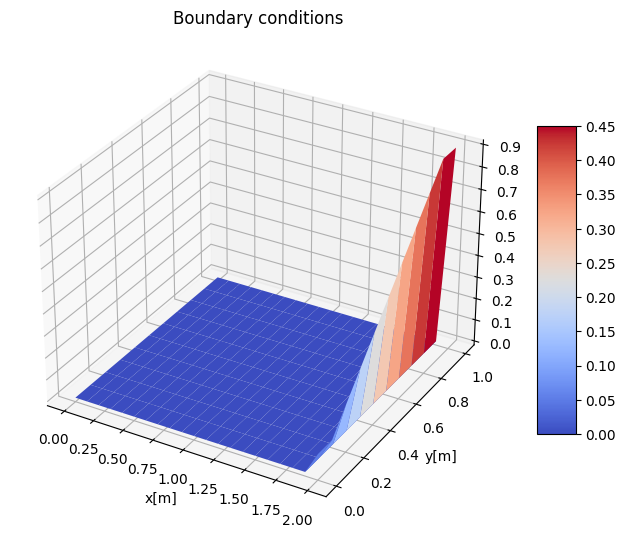

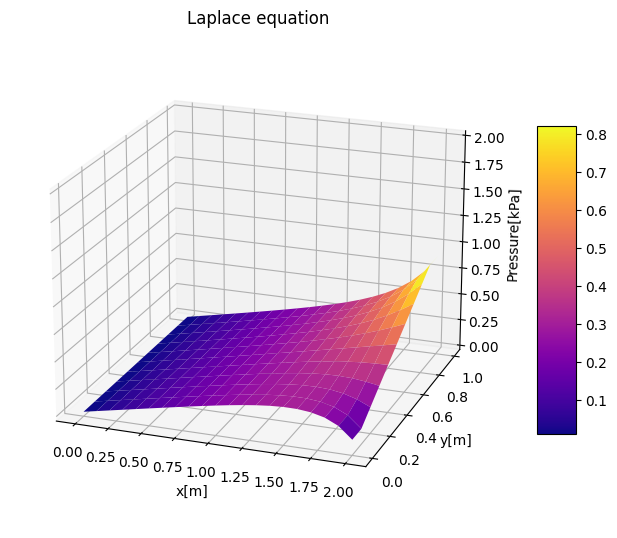

In [9]:
Lx = 2.0
Ly = 1.0
dx = 0.1
dy = 0.1
error = 1e-4

pressure = domain(Lx, Ly, dx, dy)
pressure.initialCond()
pressure.solver(error)
pressure.plot3D()